# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
# Load the required packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [2]:

# TODO: Normalize MNIST dataset and rescale the data

# Loading the MNIST dataset and normalize the features so that each value is in the range [0,1]
mnist = fetch_openml('mnist_784', version=1)

# Rescaling the data
X, y = mnist.data.to_numpy() / 255., mnist.target.to_numpy()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [3]:

# Randomly permute the data and split it into training and test sets, taking the first 500
# data samples as training and the rest as test.

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# Printing the labels and their frequencies in the training dataset

print("Labels and their frequencies in the training dataset: ")
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")


Labels and their frequencies in the training dataset: 
0: 49
1: 60
2: 35
3: 56
4: 51
5: 47
6: 46
7: 63
8: 48
9: 45


By using ".permutation" we actually shuffle the data.

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [4]:

def plot_digit(X_matrix, labels, index):
  """
  Plots a digit from the X_matrix and prints the corresponding label.
  Args:
  X_matrix (numpy.ndarray): Matrix of digit images.
  labels (numpy.ndarray): Array of digit labels.
  index (int): Index of the digit to plot and print.
  """
  print("INPUT:")
  plt.imshow(
      X_matrix[index].reshape(28,28),
      cmap          = plt.cm.gray_r,
      interpolation = "nearest"
  )
  plt.show()
  print("LABEL: %s" % labels[index])


"interpolation='nearest'" simply displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution (which is most often the case). It will result an image in which pixels are displayed as a square of multiple pixels.

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


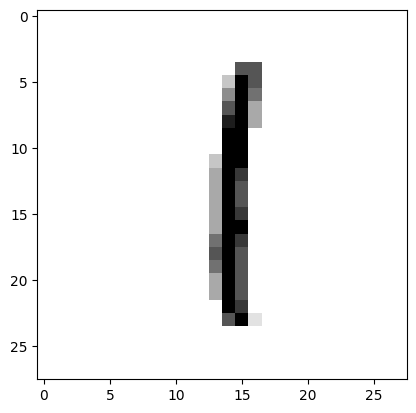

LABEL: 1
INPUT:


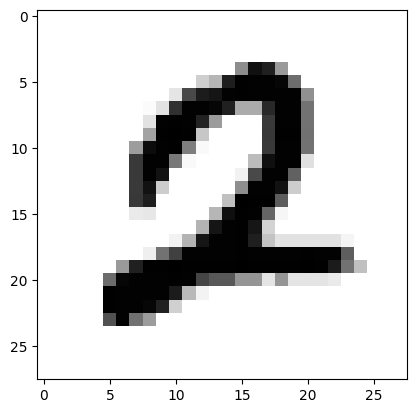

LABEL: 2


In [5]:
# Plotting the 100th digit in the training set
plot_digit(X_train, y_train, 100)

# Plotting the 40,000th digit in the test set
plot_digit(X_test, y_test,40000)

## Section 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [6]:

# Importing the Support Vector Classifier (SVC) and GridSearchCV modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Setting the parameters for the linear SVM
parameters = {'C': [1, 10, 100]}

# Creating a linear SVM object
linear_SVM = SVC(kernel='linear')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data

cv = 5
grid_search = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=cv)

grid_search.fit(X_train, y_train)

# Printing the results for the linear kernel
print('RESULTS FOR LINEAR KERNEL\n')

# Printing the best parameters set
print("Best parameters set found:")

best_params = grid_search.best_params_
print(best_params)

# Printing the score of the best parameters set
print("Score with best parameters:")

best_score = grid_search.best_score_
print(best_score)

# Printing all the scores of the different parameters set
print("\nAll scores on the grid:")

cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")


# Setting the parameters for the polynomial kernel with degree 2
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

# Creating a polynomial kernel with degree 2 SVM object
poly2_SVM = SVC(kernel='poly', degree=2)

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data

grid_search = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=cv)

grid_search.fit(X_train, y_train)

# Printing the results for the polynomial kernel with degree 2
print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

# Printing the best parameters set
print("Best parameters set found:")

best_params = grid_search.best_params_
print(best_params)

# Printing the score of the best parameters set
print("Score with best parameters:")

best_score = grid_search.best_score_
print(best_score)

# Printing all the scores of the different parameters set
print("\nAll scores on the grid:")

cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")


# Setting the parameters for the RBF kernel
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

# Creating an RBF kernel SVM object
rbf_SVM = SVC(kernel='rbf')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data

grid_search = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=cv)

grid_search.fit(X_train, y_train)

# Printing the results for the RBF kernel
print('\nRESULTS FOR RBF KERNEL\n')

# Printing the best parameters set
print("Best parameters set found:")

best_params = grid_search.best_params_
print(best_params)

# Printing the score of the best parameters set
print("Score with best parameters:")

best_score = grid_search.best_score_
print(best_score)

# Printing all the scores of the different parameters set
print("\nAll scores on the grid:")

cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.882

All scores on the grid:
Mean Score: 0.882
Parameters: {'C': 1}

Mean Score: 0.882
Parameters: {'C': 10}

Mean Score: 0.882
Parameters: {'C': 100}


RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.892

All scores on the grid:
Mean Score: 0.852
Parameters: {'C': 1, 'gamma': 0.01}

Mean Score: 0.89
Parameters: {'C': 1, 'gamma': 0.1}

Mean Score: 0.89
Parameters: {'C': 1, 'gamma': 1.0}

Mean Score: 0.892
Parameters: {'C': 10, 'gamma': 0.01}

Mean Score: 0.89
Parameters: {'C': 10, 'gamma': 0.1}

Mean Score: 0.89
Parameters: {'C': 10, 'gamma': 1.0}

Mean Score: 0.89
Parameters: {'C': 100, 'gamma': 0.01}

Mean Score: 0.89
Parameters: {'C': 100, 'gamma': 0.1}

Mean Score: 0.89
Parameters: {'C': 100, 'gamma': 1.0}


RESULTS FOR RBF KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.9

All scor

## Section 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [7]:

# Getting the best SVM model from cross-validation
best_SVM = SVC(kernel='rbf', C=10, gamma=0.01)

# Fitting the model on the entire training set
best_SVM.fit(X_train, y_train)

# Getting the training and test error
training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

# Printing the training and test error for the best SVM model
print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.108604


## Use logistic regression for comparison

## Section 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [8]:

from sklearn import linear_model
import warnings

warnings.filterwarnings("ignore")


# Creating a logistic regression object
lr = linear_model.LogisticRegression()

# TODO: Fit the model on the training data
lr.fit(X_train, y_train)

# Computing the training and test error for the logistic regression model
training_error = 1. - lr.score(X_train, y_train)
test_error = 1. - lr.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)


# Use logistic regression with 5-fold cross-validation
# You can use linear_model.LogisticRegressionCV
# Use 5-fold cross-validation to find the best choice of the parameter, then train
# the model on the entire training set

lr_cv = linear_model.LogisticRegressionCV(cv=cv, random_state=0)

# Finding the best parameter's score and then take the average to compute the error
training_error_cv = 1. - sklearn.model_selection.cross_val_score(lr_cv, X_train, y_train, cv=cv).mean()

lr_cv.fit(X_train, y_train)

test_error_cv = 1. - lr_cv.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.151223
Best logistic regression training error: 0.140000
Best logistic regression test error: 0.150791


First of all we import "warnings" library and ignore them to prevent the long and disturbing texts generated.



## Section 4
Compare and comment the results from SVM and logistic regression.

Based on the results from the Section 2 and Section 3.2, which are showing the best outputs of the $2$ methods, we conclude that the SVM method performs better on the MNIST dataset.

- The SVM is known for its ability to handle non-linear decision boundaries effectively through the use of kernel functions. The MNIST dataset consists of handwritten digits, which may have complex and non-linear patterns. The SVM's ability to capture such patterns might have contributed to its superior performance compared to logistic regression, which assumes linear decision boundaries by default.

- SVMs can implicitly perform feature transformations using kernel functions. This transformation can map the original feature space into a higher-dimensional space, making it easier to separate the classes. In the case of the MNIST dataset, the SVM might have benefited from this implicit feature transformation to better discriminate between the different digit classes.

- SVMs are generally more robust to outliers due to their margin maximization objective. Outliers, if present in the MNIST dataset, might have less impact on the SVM's decision boundary compared to logistic regression, which minimizes the least squares loss.

- SVMs can capture complex relationships in the data by utilizing different kernel functions. This flexibility allows the SVM to fit the training data more closely, potentially resulting in better generalization and improved performance on the test set. Logistic regression, being a linear model, might have limitations in capturing highly complex relationships in the MNIST dataset.

It's important to note that the performance comparison may vary based on the specific dataset and the tuning of the models.

## Section 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


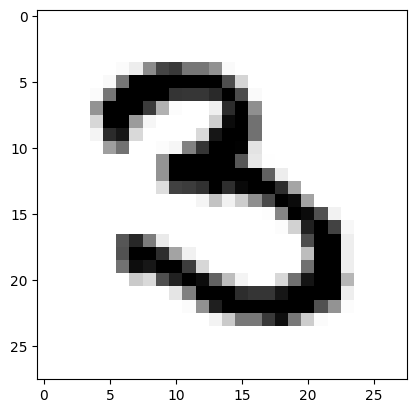

LABEL: 3
Logistic regression Label: 5
SVM Label: 3


In [9]:

# Predicting the test set by bith methods

y_pred_SVM = best_SVM.predict(X_test)
y_pred_lr = lr_cv.predict(X_test)

# Iterating over the test set and finding the label not equal with the first method's prediction, then repeating for the second method
for i in range(len(X_test)):
  if y_test[i] != y_pred_lr[i]:
    if y_test[i] == y_pred_SVM[i]:
      plot_digit(X_test, y_test, i)
      print("Logistic regression Label: %s" % y_pred_lr[i])
      print("SVM Label: %s" % y_pred_SVM[i])
      break


## More data
Now let's do the same but using 1000 data points for training.

## Section 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

Labels and their frequencies in the training dataset: 
0: 119
1: 114
2: 98
3: 99
4: 106
5: 82
6: 97
7: 103
8: 91
9: 91
-----------------------------------------------------------------------
RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.8639999999999999

All scores on the grid:
Mean Score: 0.8639999999999999
Parameters: {'C': 1}

Mean Score: 0.8639999999999999
Parameters: {'C': 10}

Mean Score: 0.8639999999999999
Parameters: {'C': 100}


RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.883

All scores on the grid:
Mean Score: 0.867
Parameters: {'C': 1, 'gamma': 0.01}

Mean Score: 0.883
Parameters: {'C': 1, 'gamma': 0.1}

Mean Score: 0.883
Parameters: {'C': 1, 'gamma': 1.0}

Mean Score: 0.882
Parameters: {'C': 10, 'gamma': 0.01}

Mean Score: 0.883
Parameters: {'C': 10, 'gamma': 0.1}

Mean Score: 0.883
Parameters: {'C': 10, 'gamma': 1.0}

Mean Score: 0.883
Parameters: {'C': 100

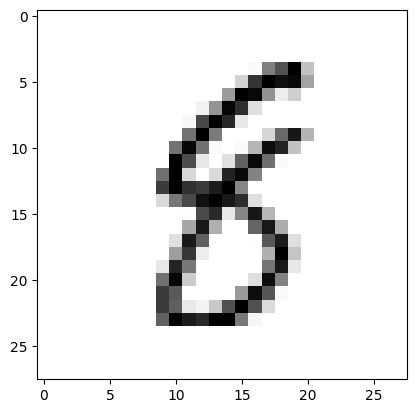

LABEL: 8
Logistic regression Label: 5
SVM Label: 8


In [10]:

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and their frequencies in the training dataset: ")
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

print("-----------------------------------------------------------------------")
#-------------------------------------------------------------------------------

parameters = {'C': [1, 10, 100]}

linear_SVM = SVC(kernel='linear')

cv = 5
grid_search = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=cv)
grid_search.fit(X_train, y_train)

print('RESULTS FOR LINEAR KERNEL\n')
print("Best parameters set found:")
best_params = grid_search.best_params_
print(best_params)
print("Score with best parameters:")
best_score = grid_search.best_score_
print(best_score)
print("\nAll scores on the grid:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")


parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

poly2_SVM = SVC(kernel='poly', degree=2)

grid_search = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=cv)
grid_search.fit(X_train, y_train)

print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')
print("Best parameters set found:")
best_params = grid_search.best_params_
print(best_params)
print("Score with best parameters:")
best_score = grid_search.best_score_
print(best_score)
print("\nAll scores on the grid:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")


parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

rbf_SVM = SVC(kernel='rbf')

grid_search = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=cv)
grid_search.fit(X_train, y_train)

print('\nRESULTS FOR RBF KERNEL\n')
print("Best parameters set found:")
best_params = grid_search.best_params_
print(best_params)
print("Score with best parameters:")
best_score = grid_search.best_score_
print(best_score)
print("\nAll scores on the grid:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("Mean Score:", mean_score)
    print("Parameters:", params)
    print("")

print("-----------------------------------------------------------------------")
#-------------------------------------------------------------------------------

best_SVM = SVC(kernel='rbf', C=10, gamma=0.01)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)

print("-----------------------------------------------------------------------")
#-------------------------------------------------------------------------------

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

training_error = 1. - lr.score(X_train, y_train)
test_error = 1. - lr.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)


lr_cv = linear_model.LogisticRegressionCV(cv=cv, random_state=0)

training_error_cv = 1. - sklearn.model_selection.cross_val_score(lr_cv, X_train, y_train, cv=cv).mean()

lr_cv.fit(X_train, y_train)

test_error_cv = 1. - lr_cv.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)

print("-----------------------------------------------------------------------")
#-------------------------------------------------------------------------------

y_pred_SVM = best_SVM.predict(X_test)
y_pred_lr = lr_cv.predict(X_test)

for i in range(len(X_test)):
  if y_test[i] != y_pred_lr[i]:
    if y_test[i] == y_pred_SVM[i]:
      plot_digit(X_test, y_test, i)
      print("Logistic regression Label: %s" % y_pred_lr[i])
      print("SVM Label: %s" % y_pred_SVM[i])
      break


## Section 7
Compare and comment on the differences with the results above.

As we see, by doubling the size of the train data, both methods, performed better on the test set. This is because by increasing the train data the models have access to a larger and more diverse set of examples. This can help improve their ability to generalize patterns and make accurate predictions on unseen data. Also, increasing the training data can help mitigate overfitting, which occurs when a model becomes too specific to the training set and fails to generalize well. With more data, the models are exposed to a wider range of instances and are less likely to memorize specific training examples. This can lead to better generalization performance and a decrease in overfitting.

There is also a probability of decreasing in the output depending on the dataset added.